# Matplotlib: Lines and markers

Let's draw some lines using the default styles:

In [1]:
%config InlineBackend.figure_format = 'svg'

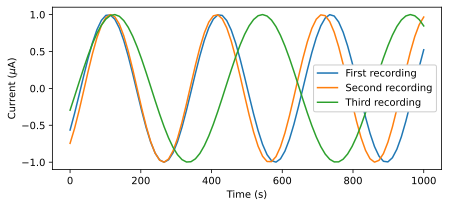

In [4]:
# Import matplotlib and numpy, generate some data
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1000, 80)
c1 = np.sin((t - 30) * 0.02)
c2 = np.sin((t - 40) * 0.021)
c3 = np.sin((t - 20) * 0.015)

# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')
ax.plot(t, c3, label='Third recording')

# Add a legend
ax.legend(framealpha=1)

# Show the figure
plt.show()

## Short-hand syntax

we can customise these lines using the short-hand syntax that sets colour, line style, and marker.
For a full description, see ["notes" on this page](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

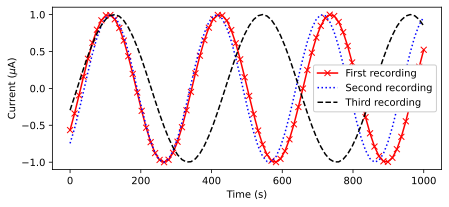

In [8]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1, 'r-x', label='First recording')
ax.plot(t, c2, 'b:', label='Second recording')
ax.plot(t, c3, 'k--', label='Third recording')
ax.legend(framealpha=1)
plt.show()

References:
- [colour codes](https://matplotlib.org/stable/tutorials/colors/colors.html)
- [line style codes](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)
- [marker codes](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

## Colours

If we want to code to be a bit more readable, we can use separate arguments for each aspect.
For example, colour can be set using the `color` argument:

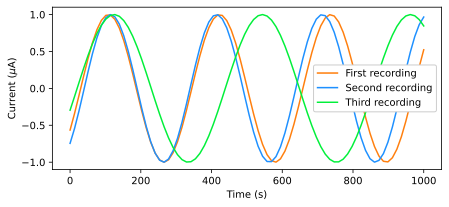

In [16]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
ax.plot(t, c1, color='tab:orange', label='First recording')
ax.plot(t, c2, color='dodgerblue', label='Second recording')
ax.plot(t, c3, color='#01ef3a', label='Third recording')
ax.legend(framealpha=1)
plt.show()

This gives us access to the full list of [named colours](https://matplotlib.org/stable/gallery/color/named_colors.html), lets us use RGB codes, and makes it easier to program things:

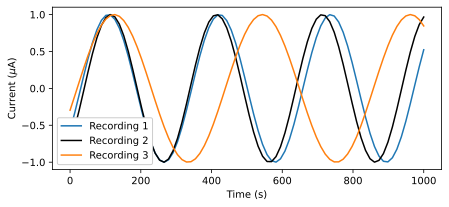

In [17]:
data = [c1, c2, c3]
colours = ['tab:blue', 'black', 'tab:orange']
labels = [f'Recording {1 + i}' for i in range(3)]

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')
for y, color, label in zip(data, colours, labels):
    ax.plot(t, y, color=color, label=label)
ax.legend(framealpha=1)
plt.show()

### Setting with a colour map


### Setting with a colour cycle



## alpha 

(but show example where it went wrong! plus EPS!)

## line width, style etc. 
(Leave the same until need to change!)

## zorder


## markers


## drawstyle (steps)